In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj0,qobj1,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    __, __, Skk0, Okk0 = local.load_spec(qobj0,mb,rlz=rlz,cn=cn)
    __, __, Skk1, Okk1 = local.load_spec(qobj1,mb,rlz=rlz,cn=cn)
    Skk = (Skk0-Skk1)
    Okk = (Okk0-Okk1)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$10^2L^{0.5}C_L^{\kappa\kappa}$')
    #errorbar(mb.bc-5,Mkk,yerr=Vkk,fmt='o')
    errorbar(mb.bc-5,Okk-Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [10]:
dirs = local.data_directory()
qobj = {}
for qid in ['comb_d','comb_n']:
    aobj = local.init_analysis_params(qid=qid,ascale=3.,wtype='com16v0PT')
    qobj[qid] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

chi: -0.5 , chi (sim mean): -0.0 , chi (sim std): 4.9 , PTE: 0.98 
chi^2: 9.7 , chi^2 (sim): 11.2 , PTE: 0.53 
chi: -0.5 , chi (sim mean): -0.0 , chi (sim std): 4.9 , PTE: 0.98 
chi^2: 6.2 , chi^2 (sim): 11.2 , PTE: 0.81 


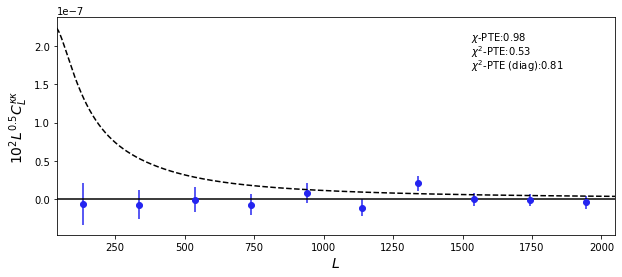

In [12]:
plot_spec(qobj['comb_d'],qobj['comb_n'],bnum=10,lmin=40)